In [ ]:
# Name:  Multi-Class Prediction of Obesity Risk
# Url:  https://www.kaggle.com/competitions/playground-series-s4e2/leaderboard
# username: the-usman


# The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)
!pip install optuna

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler, PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import optuna
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
train_df = pd.read_csv('data/competition_data/train.csv', index_col=[0])
original_df = pd.read_csv('data/original_data/ObesityDataSet.csv',)

In [ ]:
train_df.head()


In [ ]:
train_df.shape

In [ ]:
original_df.head()

In [ ]:
original_df.shape

In [ ]:
original_df.duplicated().sum()
original_df.drop_duplicates(inplace=True)

In [ ]:
train_df.duplicated().sum()

In [ ]:
sns.heatmap(original_df.isna())

In [ ]:
sns.heatmap(train_df.isna())

In [ ]:
original_df.shape

In [ ]:
merged_df = pd.concat([train_df, original_df], axis=0).reset_index()

In [425]:
inputs = merged_df.drop(["NObeyesdad", "index"], axis=1)
target = merged_df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.25, random_state=42)

In [426]:
X_train.shape

(17133, 16)

In [ ]:
# Performing EDA 
def DataAnalysis1(data, column, original_data, merged_data) :
    cat_cols = data.select_dtypes('object')
    num_cols = data.select_dtypes(np.number)
    plt.figure(figsize=(14, 14))
    if column in cat_cols :
        plt.subplot(3,2,1)
        plt.title(f"Train Df Count Plot for {column}")
        sns.countplot(x=data[column], hue=data['NObeyesdad'])
        plt.subplot(3,2,2)
        plt.title(f"Train DF Pie plot for {column}")
        plt.pie(data[column].value_counts(), labels=data[column].value_counts().index,  autopct='%1.1f%%')


        plt.subplot(3,2,3)
        plt.title(f"Original DF Count Plot for {column}")
        sns.countplot(x=original_data[column], hue=original_data['NObeyesdad'])
        plt.subplot(3,2,4)
        plt.title(f"Original DF Pie plot for {column}")
        plt.pie(original_data[column].value_counts(), labels=original_data[column].value_counts().index,  autopct='%1.1f%%')

        plt.subplot(3,2,5)
        plt.title(f"Merge DF Count Plot for {column}")
        sns.countplot(x=merged_data[column], hue=merged_data['NObeyesdad'])
        plt.subplot(3,2,6)
        plt.title(f"Merge DF Pie plot for {column}")
        plt.pie(merged_data[column].value_counts(), labels=merged_data[column].value_counts().index,  autopct='%1.1f%%')
        plt.xticks(rotation=70)
        plt.tight_layout()
        plt.show()
        
    if column in num_cols :
        
        plt.subplot(3,2,1)
        plt.title(f"Train DF Histogram Plot for {column}")
        sns.histplot(x=data[column], hue=data['NObeyesdad'], kde=True)
        plt.subplot(3,2,2)
        plt.title(f"Train DF Box Plot for {column}")
        sns.boxplot(x=data[column], hue=data['NObeyesdad'])


        plt.subplot(3,2,3)
        plt.title(f"Original DF Histogram Plot for {column}")
        sns.histplot(x=original_data[column], hue=original_data['NObeyesdad'], kde=True)
        plt.subplot(3,2,4)
        plt.title(f"Original DF Box Plot for {column}")
        sns.boxplot(x=original_data[column], hue=original_data['NObeyesdad'])


        plt.subplot(3,2,5)
        plt.title(f"Merge DF Histogram Plot for {column}")
        sns.histplot(x=merged_data[column], hue=merged_data['NObeyesdad'], kde=True)
        plt.subplot(3,2,6)
        plt.title(f"Merge DF Box Plot for {column}")
        sns.boxplot(x=merged_data[column], hue=merged_data['NObeyesdad'])


        plt.show()




In [ ]:
train_df.columns

In [ ]:
for column in merged_df.columns :
    DataAnalysis1(train_df, column, original_df, merged_data=merged_df)

In [ ]:
plt.figure(figsize=(14, 8))
data_sample = merged_df.sample(4000)
sns.regplot(x=data_sample['Weight'], y=data_sample['Height'])

In [ ]:
plt.figure(figsize=(14, 8))
sns.regplot(x=data_sample['Weight'], y=data_sample['Age'])

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=data_sample['Weight'], y=data_sample['Height'], hue=data_sample['NObeyesdad'], style=data_sample['SMOKE'])

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=data_sample['Weight'], y=data_sample['Height'], hue=data_sample['NObeyesdad'], style=data_sample['CALC'])

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=data_sample['Weight'], y=data_sample['Height'], hue=data_sample['NObeyesdad'], style=data_sample['CAEC'])

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=data_sample['Weight'], y=data_sample['Height'], hue=data_sample['NObeyesdad'], style=data_sample['MTRANS'])

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=data_sample['Weight'], y=data_sample['Height'], hue=data_sample['NObeyesdad'], style=data_sample['FAVC'])

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=data_sample['Weight'], y=data_sample['FCVC'], hue=data_sample['NObeyesdad'])

In [ ]:
# Checking Distribution of Data

def CheckDistribution(data, column) :
    num_cols = data.select_dtypes(np.number)
    plt.figure(figsize=(14, 8))
    # print(len(data[column]))
    if column in num_cols :
        plt.subplot(1,2,1)
        plt.title(f"Q-Q Plot for {column}")
        stats.probplot(data[column], dist="norm", plot=plt)
        plt.subplot(1,2,2)
        plt.title(f"KDE Plot for {column}")
        sns.kdeplot(data[column])
        plt.show()
        statistic, p_value = stats.shapiro(data[column])
        print(f"P-Value: {p_value}")
        print(f"Statistic: {statistic}")
        alpha = 0.05
        if p_value > alpha:
            print("Sample looks Gaussian (fail to reject H0)")
        else:
            print("Sample does not look Gaussian (reject H0)")



In [ ]:
for column in merged_df.columns :

    CheckDistribution(merged_df.sample(4000), column)

In [ ]:
# No data column look like normal distribution

In [ ]:
# The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS)

In [ ]:
# Feature Engineering

In [427]:
class FeatureEngineering(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        bmi = X['Weight']/(X['Height'] * X['Height'])
        X['BMI'] = bmi
        return X

In [428]:
train_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [429]:
ohe_encoding = ColumnTransformer([
    ("OHE_Encoder", OneHotEncoder(sparse_output=False, drop='first'), ['Gender', 'FAVC', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'SCC', 'MTRANS', 'CALC' ]),
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')
ordinal_encoding = ColumnTransformer([
    ("OHE_Encoder", OrdinalEncoder(), ['Gender', 'FAVC', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'SCC', 'MTRANS', 'CALC' ]),
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

In [430]:
class LabelEncoding(BaseEstimator, TransformerMixin) :
    def __init__(self) :
        self.encoder = LabelEncoder()
    
    def fit(self, X, y=None) :
        self.encoder.fit([X])
        return self

    def transform(self, X, y=None) :
        X= self.encoder.transform([X])
        return X

In [431]:
Scaling_Minmax = ColumnTransformer([
    ("scaling", MinMaxScaler(), ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI' ])
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

Scaling_Standard = ColumnTransformer([
    ("scaling", StandardScaler(), ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI' ])
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

Dist_Change = ColumnTransformer([
    ("Dist_Change", PowerTransformer(), ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI' ])
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

In [432]:

data_pipe = Pipeline([
    ("Feature Engineering", FeatureEngineering()),
    ('Encoding', ohe_encoding),
    ('Scaling', Scaling_Standard),
    # ('Change_Dist', Dist_Change)
])

In [433]:
X_train = data_pipe.fit_transform(X_train)


In [434]:
X_test = data_pipe.transform(X_test)

In [435]:
le = LabelEncoder()
y_train=  le.fit_transform(y_train)


In [436]:
y_test = le.fit_transform(y_test)

In [437]:
# Optimization Using of hyperparameters using optuna

In [438]:
num_classes = len(np.unique(y_train))
def objective(trial, model_name):
    if model_name == 'xgboost':
        params = {
            'objective': 'multi:softmax',
            'num_class': num_classes,
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 0.2),
            'reg_alpha': trial.suggest_float('reg_alpha', 0, 0.2),
            'reg_lambda': trial.suggest_float('reg_lambda', 0, 0.2),
            'min_child_weight': trial.suggest_float('min_child_weight', 1, 5),
        }
        model = XGBClassifier(**params)
    elif model_name == 'lightgbm':
        params = {
            'objective': 'multiclass',
            'num_class': num_classes,
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0, 0.2),
            'reg_lambda': trial.suggest_float('reg_lambda', 0, 0.2),
            'min_child_weight': trial.suggest_float('min_child_weight', 1, 5),
        }
        model = LGBMClassifier(**params)
    elif model_name == 'catboost':
        params = {
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
            'depth': trial.suggest_int('depth', 3, 10),
            'iterations': trial.suggest_int('iterations', 100, 500),
            # 'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.6, 1.0),
            'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0, 5),
        }
        model = CatBoostClassifier(**params, verbose=0)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    return score






def run_optimization(model_name, n_trials=100):
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, model_name), n_trials=n_trials)
    best_params = study.best_params
    return best_params



In [439]:
# best_params_xgboost = run_optimization('xgboost')
# best_params_lightgbm = run_optimization('lightgbm')
# best_params_catboost = run_optimization('catboost')

In [440]:
best_params_catboost={'learning_rate': 0.24962668934142374, 'depth': 6, 'iterations': 305, 'colsample_bylevel': 0.758826587850649, 'l2_leaf_reg': 2.5617249413713687}

In [441]:
xgb_model = XGBClassifier(**best_params_xgboost, random_state =42).fit(X_train, y_train)
lgbm_model = LGBMClassifier(**best_params_lightgbm, random_state =42).fit(X_train, y_train)
cat_model = CatBoostClassifier(**best_params_catboost, random_state =42, verbose=0).fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2294
[LightGBM] [Info] Number of data points in the train set: 17133, number of used features: 24
[LightGBM] [Info] Start training from score -2.113458
[LightGBM] [Info] Start training from score -1.920325
[LightGBM] [Info] Start training from score -1.951881
[LightGBM] [Info] Start training from score -1.864562
[LightGBM] [Info] Start training from score -1.653163
[LightGBM] [Info] Start training from score -2.123167
[LightGBM] [Info] Start training from score -2.083008
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [442]:
xgb_pred = xgb_model.predict(X_test)
lgb_pred = lgbm_model.predict(X_test)
cat_pred = cat_model.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


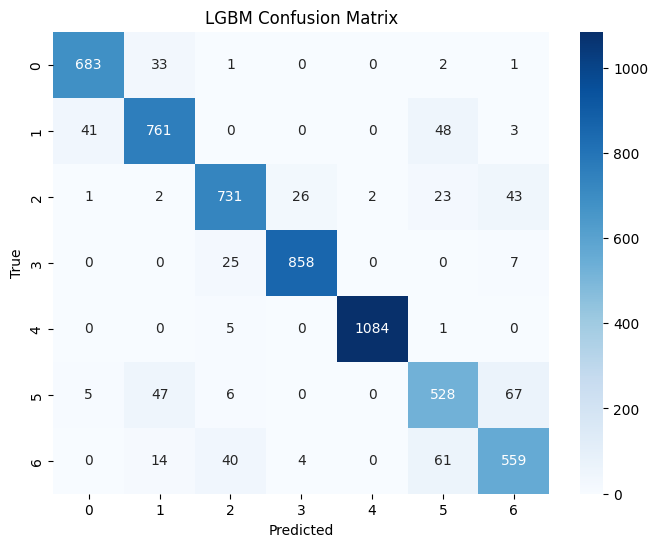

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       720
           1       0.89      0.89      0.89       853
           2       0.90      0.88      0.89       828
           3       0.97      0.96      0.97       890
           4       1.00      0.99      1.00      1090
           5       0.80      0.81      0.80       653
           6       0.82      0.82      0.82       678

    accuracy                           0.91      5712
   macro avg       0.90      0.90      0.90      5712
weighted avg       0.91      0.91      0.91      5712

0.9110644257703081


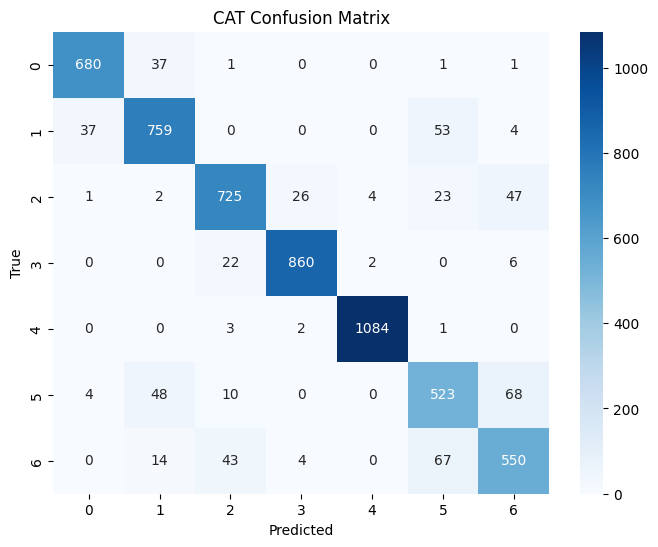

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       720
           1       0.88      0.89      0.89       853
           2       0.90      0.88      0.89       828
           3       0.96      0.97      0.97       890
           4       0.99      0.99      0.99      1090
           5       0.78      0.80      0.79       653
           6       0.81      0.81      0.81       678

    accuracy                           0.91      5712
   macro avg       0.90      0.90      0.90      5712
weighted avg       0.91      0.91      0.91      5712

0.9070378151260504


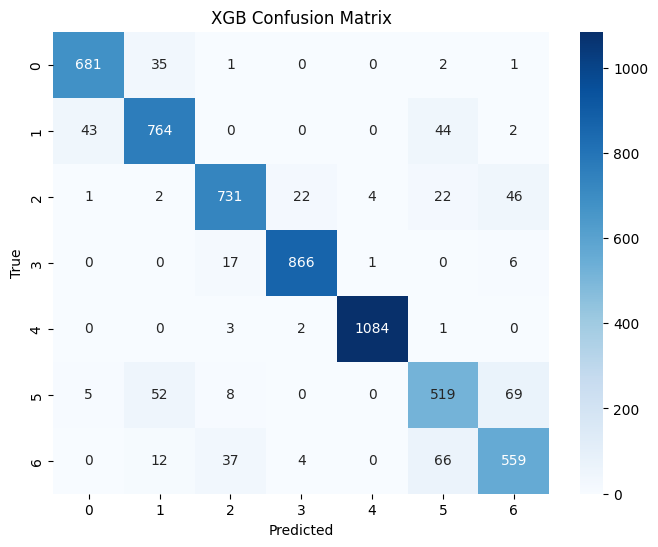

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       720
           1       0.88      0.90      0.89       853
           2       0.92      0.88      0.90       828
           3       0.97      0.97      0.97       890
           4       1.00      0.99      0.99      1090
           5       0.79      0.79      0.79       653
           6       0.82      0.82      0.82       678

    accuracy                           0.91      5712
   macro avg       0.90      0.90      0.90      5712
weighted avg       0.91      0.91      0.91      5712

0.9110644257703081


In [443]:
for key, y_pred in {"LGBM": lgb_pred,"CAT": cat_pred,"XGB": xgb_pred}.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{key} Confusion Matrix')
    plt.show()
    print(classification_report(y_true=y_test, y_pred=y_pred))
    print(accuracy_score(y_true=y_test, y_pred=y_pred))

In [ ]:
inputs = data_pipe.fit_transform(inputs)

In [ ]:
test_df = pd.read_csv('data/competition_data/test.csv', index_col=[0])

In [ ]:
sub_df = pd.read_csv('data/competition_data/sample_submission.csv')

In [ ]:
test_df = data_pipe.transform(test_df)

In [ ]:
le = LabelEncoder()
le.fit(target)
target1 = le.transform(target)
target1

In [ ]:
for key, model in {"LGBM": LGBMClassifier(**best_params_lightgbm, random_state =42), "XGB": XGBClassifier(**best_params_xgboost, random_state =42), "CAT": CatBoostClassifier(**best_params_catboost, random_state =42, verbose=0) }.items() :
    model.fit(inputs, target1)
    y_pred = model.predict(test_df)
    
    sub_df['NObeyesdad'] = le.inverse_transform(y_pred)
    sub_df.to_csv(f"prediction_{key}.csv", index=False)

In [ ]:
sub_df